# UR5e

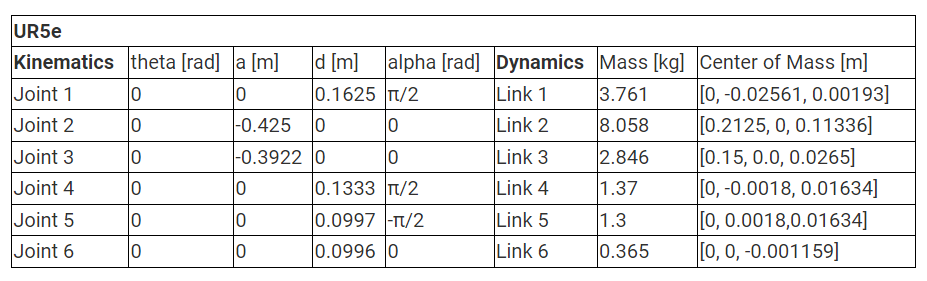

https://www.universal-robots.com/articles/ur/application-installation/dh-parameters-for-calculations-of-kinematics-and-dynamics/

In [23]:
# Basic Info about UR5e Robot

M = [3.761, 8.058, 2.846, 1.37, 1.3, 0.365]   # Link masses
L = [100, 50]   # Link lengths
g = 9.8         # Gravity

q = [0, 0, 0, 0, 0, 0]    # relative joint angles
Rot = ['z', 'x', 'x', 'x', 'z', 'x']
Trans = [
    [0,       0,    0.165],
    [-0.425,  0,    0],
    [-0.3922,   0,    0],
    [0,  0,    0.1333],
    [0,  0,    0.0997],
    [0,  0,    0.0996]
] #offsets for links - assumed+taken from ref

### Functions

In [15]:
from scipy.spatial.transform import Rotation as R
import numpy as np

import matplotlib.pyplot as plt
from itertools import product, combinations


# below option is used to show up only 2 digit after decimal point for floats
np.set_printoptions(formatter={'float_kind': "{: .2f}".format})

In [16]:
class H:
  def from_euler(order='z', rotation=90, translation=[0, 0, 0], degree=True):
  #def from_euler(order='xyz', rotation=[0, 0, 0], translation=[0, 0, 0], degree=True):

    th = np.pi*rotation/180

    if order=='x':
      arr = np.array([
          [1,       0,             0,       translation[0]],
          [0,   np.cos(th),   -np.sin(th),  translation[1]],
          [0,   np.sin(th),   np.cos(th),   translation[2]],
          [0,   0,            0,            1             ]
      ])
    elif order=='y':
      arr = np.array([
          [np.cos(th),      0,     np.sin(th),  translation[0]],
          [0,               1,        0,        translation[1]],
          [-np.sin(th),     0,     np.cos(th),  translation[2]],
          [0,   0,            0,            1                 ]
      ])
    elif order=='z':
      arr = np.array([
          [np.cos(th),      -np.sin(th),    0, translation[0]],
          [np.sin(th),      np.cos(th),     0, translation[1]],
          [0,                   0,          1, translation[2]],
          [0,   0,            0,            1                ]
      ])

    return arr

r = H.from_euler('z', 90)
r

array([[ 0.00, -1.00,  0.00,  0.00],
       [ 1.00,  0.00,  0.00,  0.00],
       [ 0.00,  0.00,  1.00,  0.00],
       [ 0.00,  0.00,  0.00,  1.00]])

In [17]:
def get_rot_mat(P0):
  P = []
  P.append(P0[0][0:3])
  P.append(P0[1][0:3])
  P.append(P0[2][0:3])

  return R.from_matrix(P)

r = get_rot_mat(r)
r.as_matrix()

array([[ 0.00, -1.00,  0.00],
       [ 1.00,  0.00,  0.00],
       [ 0.00,  0.00,  1.00]])

### Q3 - Rotation matrices in homogeneous transformations


In [24]:
Rx, Hx = [], []

for i in range(len(q)):
  Hx.append(H.from_euler(Rot[i], q[i], Trans[i]))

for r in Hx:
  Rx.append(get_rot_mat(r).as_matrix())

Rx, Hx

([array([[ 1.00,  0.00,  0.00],
         [ 0.00,  1.00,  0.00],
         [ 0.00,  0.00,  1.00]]),
  array([[ 1.00,  0.00,  0.00],
         [ 0.00,  1.00,  0.00],
         [ 0.00,  0.00,  1.00]]),
  array([[ 1.00,  0.00,  0.00],
         [ 0.00,  1.00,  0.00],
         [ 0.00,  0.00,  1.00]]),
  array([[ 1.00,  0.00,  0.00],
         [ 0.00,  1.00,  0.00],
         [ 0.00,  0.00,  1.00]]),
  array([[ 1.00,  0.00,  0.00],
         [ 0.00,  1.00,  0.00],
         [ 0.00,  0.00,  1.00]]),
  array([[ 1.00,  0.00,  0.00],
         [ 0.00,  1.00,  0.00],
         [ 0.00,  0.00,  1.00]])],
 [array([[ 1.00, -0.00,  0.00,  0.00],
         [ 0.00,  1.00,  0.00,  0.00],
         [ 0.00,  0.00,  1.00,  0.17],
         [ 0.00,  0.00,  0.00,  1.00]]),
  array([[ 1.00,  0.00,  0.00, -0.42],
         [ 0.00,  1.00, -0.00,  0.00],
         [ 0.00,  0.00,  1.00,  0.00],
         [ 0.00,  0.00,  0.00,  1.00]]),
  array([[ 1.00,  0.00,  0.00, -0.39],
         [ 0.00,  1.00, -0.00,  0.00],
         [ 0.00, 

## Ref
